In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel("C:\\Users\\farhanfarooq\\Desktop\\work files\\ExcelR\\Assignments\\Assign.Forecasting\\Airlines+Data.xlsx")
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [3]:
data=df.copy()
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [4]:
t=np.arange(1,len(data)+1)
data['t']=t
data['t_square']=data['t']*data['t']

In [5]:
log_Passengers=np.log(data['Passengers'])
data['log_Passengers']=log_Passengers

In [6]:
data.head()

,Month,Passengers,t,t_square,log_Passengers
0,1995-01-01,112,1,1,4.718499
1,1995-02-01,118,2,4,4.770685
2,1995-03-01,132,3,9,4.882802
3,1995-04-01,129,4,16,4.859812
4,1995-05-01,121,5,25,4.795791


In [7]:
data['Date'] = pd.to_datetime(data.Month,format='%b-%y')

data['month']=data.Date.dt.strftime('%b') # month extraction
data['year']=data.Date.dt.strftime('%y') # year extraction

data

,Month,Passengers,t,t_square,log_Passengers,Date,month,year
0,1995-01-01,112,1,1,4.718499,1995-01-01,Jan,95
1,1995-02-01,118,2,4,4.770685,1995-02-01,Feb,95
2,1995-03-01,132,3,9,4.882802,1995-03-01,Mar,95
3,1995-04-01,129,4,16,4.859812,1995-04-01,Apr,95
4,1995-05-01,121,5,25,4.795791,1995-05-01,May,95
...,...,...,...,...,...,...,...,...
91,2002-08-01,405,92,8464,6.003887,2002-08-01,Aug,02
92,2002-09-01,355,93,8649,5.872118,2002-09-01,Sep,02
93,2002-10-01,306,94,8836,5.723585,2002-10-01,Oct,02
94,2002-11-01,271,95,9025,5.602119,2002-11-01,Nov,02


In [8]:
dummy = pd.DataFrame(pd.get_dummies(data['month']))
dummy.reindex(sorted(dummy.columns), axis=1)
colsequence = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dummy = dummy.reindex(columns=colsequence )

data1= pd.concat([data,dummy], axis=1)
data1

,Month,Passengers,t,t_square,log_Passengers,Date,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1995-01-01,112,1,1,4.718499,1995-01-01,Jan,95,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-01,118,2,4,4.770685,1995-02-01,Feb,95,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-01,132,3,9,4.882802,1995-03-01,Mar,95,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-01,129,4,16,4.859812,1995-04-01,Apr,95,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-01,121,5,25,4.795791,1995-05-01,May,95,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,92,8464,6.003887,2002-08-01,Aug,02,0,0,0,0,0,0,0,1,0,0,0,0
92,2002-09-01,355,93,8649,5.872118,2002-09-01,Sep,02,0,0,0,0,0,0,0,0,1,0,0,0
93,2002-10-01,306,94,8836,5.723585,2002-10-01,Oct,02,0,0,0,0,0,0,0,0,0,1,0,0
94,2002-11-01,271,95,9025,5.602119,2002-11-01,Nov,02,0,0,0,0,0,0,0,0,0,0,1,0


In [9]:
new_data=data1.drop(['Date'],axis='columns')
new_data

,Month,Passengers,t,t_square,log_Passengers,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1995-01-01,112,1,1,4.718499,Jan,95,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-01,118,2,4,4.770685,Feb,95,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-01,132,3,9,4.882802,Mar,95,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-01,129,4,16,4.859812,Apr,95,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-01,121,5,25,4.795791,May,95,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,92,8464,6.003887,Aug,02,0,0,0,0,0,0,0,1,0,0,0,0
92,2002-09-01,355,93,8649,5.872118,Sep,02,0,0,0,0,0,0,0,0,1,0,0,0
93,2002-10-01,306,94,8836,5.723585,Oct,02,0,0,0,0,0,0,0,0,0,1,0,0
94,2002-11-01,271,95,9025,5.602119,Nov,02,0,0,0,0,0,0,0,0,0,0,1,0


In [10]:
new_data.to_excel('New_Passenger_Data.xlsx')

month  Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep
year                                                             
00     227  293  229  188  204  302  264  235  234  203  229  259
01     269  347  278  233  242  364  315  267  270  237  274  312
02     313  405  306  277  284  413  374  317  318  271  306  355
95     129  148  118  118  112  148  135  132  121  104  119  136
96     135  170  140  126  115  170  149  141  125  114  133  158
97     163  199  166  150  145  199  178  178  172  146  162  184
98     181  242  194  180  171  230  218  193  183  172  191  209
99     235  272  201  196  196  264  243  236  229  180  211  237


<AxesSubplot:xlabel='month', ylabel='year'>

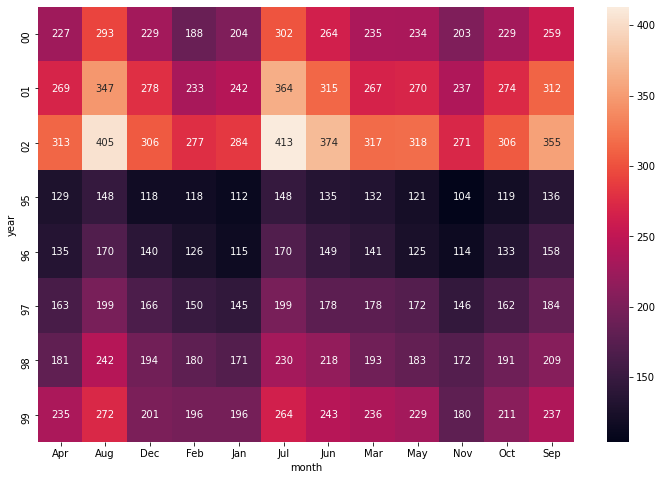

In [11]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=data,values='Passengers',index='year',columns='month',
                                aggfunc='mean',fill_value=0)
print(heatmap_y_month)
sns.heatmap(heatmap_y_month,annot=True,fmt='g') # fmt is the format of the grid values

<AxesSubplot:xlabel='year', ylabel='Passengers'>

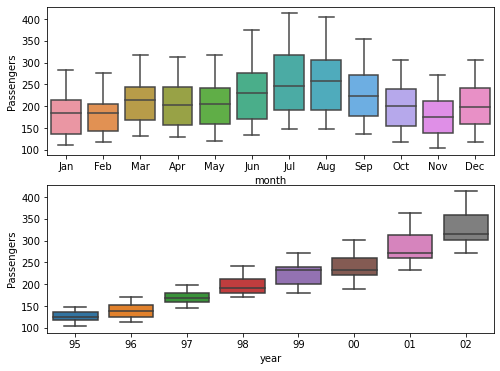

In [12]:
#Boxplot for every month and year
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x='month',y='Passengers',data=data)
plt.subplot(212)
sns.boxplot(x='year',y='Passengers',data=data)

<AxesSubplot:xlabel='year', ylabel='Passengers'>

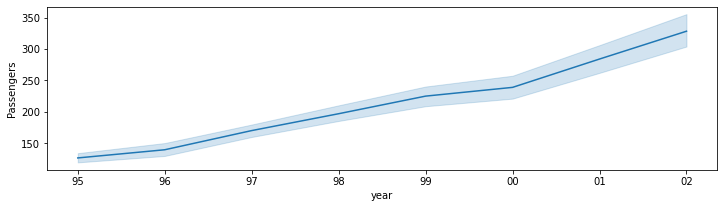

In [13]:
plt.figure(figsize=(12,3))
sns.lineplot(x='year',y='Passengers',data = data)

<AxesSubplot:xlabel='month', ylabel='Passengers'>

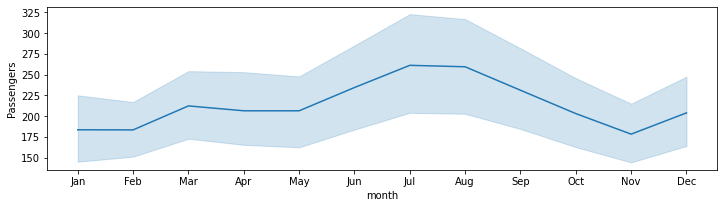

In [14]:
plt.figure(figsize=(12,3))
sns.lineplot(x='month',y='Passengers',data = data)

# Splitting The Data

In [15]:
Train=data1.head(76)
Test=data1.tail(20)

In [16]:
Test

,Month,Passengers,t,t_square,log_Passengers,Date,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
76,2001-05-01,270,77,5929,5.598422,2001-05-01,May,01,0,0,0,0,1,0,0,0,0,0,0,0
77,2001-06-01,315,78,6084,5.752573,2001-06-01,Jun,01,0,0,0,0,0,1,0,0,0,0,0,0
78,2001-07-01,364,79,6241,5.897154,2001-07-01,Jul,01,0,0,0,0,0,0,1,0,0,0,0,0
79,2001-08-01,347,80,6400,5.849325,2001-08-01,Aug,01,0,0,0,0,0,0,0,1,0,0,0,0
80,2001-09-01,312,81,6561,5.743003,2001-09-01,Sep,01,0,0,0,0,0,0,0,0,1,0,0,0
81,2001-10-01,274,82,6724,5.613128,2001-10-01,Oct,01,0,0,0,0,0,0,0,0,0,1,0,0
82,2001-11-01,237,83,6889,5.468060,2001-11-01,Nov,01,0,0,0,0,0,0,0,0,0,0,1,0
83,2001-12-01,278,84,7056,5.627621,2001-12-01,Dec,01,0,0,0,0,0,0,0,0,0,0,0,1
84,2002-01-01,284,85,7225,5.648974,2002-01-01,Jan,02,1,0,0,0,0,0,0,0,0,0,0,0
85,2002-02-01,277,86,7396,5.624018,2002-02-01,Feb,02,0,1,0,0,0,0,0,0,0,0,0,0


# Importing Models

In [17]:
import statsmodels.formula.api as smf
#linear model
linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

57.00014788256585

In [18]:
#Quadratic 

Quad = smf.ols('Passengers~t+t_square',
               data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

58.494274639472664

In [19]:
#Exponential

Exp = smf.ols('log_Passengers~t',
              data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp


46.621543947194006

In [20]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',
                      data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

11.784250178761212

In [21]:
#Additive seasonality 

add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

132.2541343994949

In [22]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

39.75976633805682

In [23]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

137.61090856256564

In [24]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,11.784250
4,rmse_add_sea_quad,39.759766
1,rmse_Exp,46.621544
0,rmse_linear,57.000148
2,rmse_Quad,58.494275
3,rmse_add_sea,132.254134
5,rmse_Mult_sea,137.610909


# Prediction For New Time Period

In [25]:
new_data=pd.read_excel('New_Passenger_Data.xlsx')
new_data.head(10)

,Unnamed: 0,Month,Passengers,t,t_square,log_Passengers,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,0,1995-01-01,112,1,1,4.718499,Jan,95,1,0,0,0,0,0,0,0,0,0,0,0
1,1,1995-02-01,118,2,4,4.770685,Feb,95,0,1,0,0,0,0,0,0,0,0,0,0
2,2,1995-03-01,132,3,9,4.882802,Mar,95,0,0,1,0,0,0,0,0,0,0,0,0
3,3,1995-04-01,129,4,16,4.859812,Apr,95,0,0,0,1,0,0,0,0,0,0,0,0
4,4,1995-05-01,121,5,25,4.795791,May,95,0,0,0,0,1,0,0,0,0,0,0,0
5,5,1995-06-01,135,6,36,4.905275,Jun,95,0,0,0,0,0,1,0,0,0,0,0,0
6,6,1995-07-01,148,7,49,4.997212,Jul,95,0,0,0,0,0,0,1,0,0,0,0,0
7,7,1995-08-01,148,8,64,4.997212,Aug,95,0,0,0,0,0,0,0,1,0,0,0,0
8,8,1995-09-01,136,9,81,4.912655,Sep,95,0,0,0,0,0,0,0,0,1,0,0,0
9,9,1995-10-01,119,10,100,4.779123,Oct,95,0,0,0,0,0,0,0,0,0,1,0,0


In [26]:
data2=new_data.iloc[:,1:19]
data2

,Month,Passengers,t,t_square,log_Passengers,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov
0,1995-01-01,112,1,1,4.718499,Jan,95,1,0,0,0,0,0,0,0,0,0,0
1,1995-02-01,118,2,4,4.770685,Feb,95,0,1,0,0,0,0,0,0,0,0,0
2,1995-03-01,132,3,9,4.882802,Mar,95,0,0,1,0,0,0,0,0,0,0,0
3,1995-04-01,129,4,16,4.859812,Apr,95,0,0,0,1,0,0,0,0,0,0,0
4,1995-05-01,121,5,25,4.795791,May,95,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,92,8464,6.003887,Aug,2,0,0,0,0,0,0,0,1,0,0,0
92,2002-09-01,355,93,8649,5.872118,Sep,2,0,0,0,0,0,0,0,0,1,0,0
93,2002-10-01,306,94,8836,5.723585,Oct,2,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,95,9025,5.602119,Nov,2,0,0,0,0,0,0,0,0,0,0,1


In [27]:
#Build the model on entire data set
model_full = smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',
                     data=data2).fit()

In [28]:
pred_new  = pd.Series(model_full.predict(data2))
pred_new

0     101.802790
1     100.717631
2     128.632471
3     121.797312
4     120.837153
         ...    
91    371.087153
92    343.797312
93    316.632471
94    292.842631
95    319.427790
Length: 96, dtype: float64

In [29]:
data2["forecasted_Passengers"] = pd.Series(pred_new)
data2

,Month,Passengers,t,t_square,log_Passengers,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,forecasted_Passengers
0,1995-01-01,112,1,1,4.718499,Jan,95,1,0,0,0,0,0,0,0,0,0,0,101.802790
1,1995-02-01,118,2,4,4.770685,Feb,95,0,1,0,0,0,0,0,0,0,0,0,100.717631
2,1995-03-01,132,3,9,4.882802,Mar,95,0,0,1,0,0,0,0,0,0,0,0,128.632471
3,1995-04-01,129,4,16,4.859812,Apr,95,0,0,0,1,0,0,0,0,0,0,0,121.797312
4,1995-05-01,121,5,25,4.795791,May,95,0,0,0,0,1,0,0,0,0,0,0,120.837153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,92,8464,6.003887,Aug,2,0,0,0,0,0,0,0,1,0,0,0,371.087153
92,2002-09-01,355,93,8649,5.872118,Sep,2,0,0,0,0,0,0,0,0,1,0,0,343.797312
93,2002-10-01,306,94,8836,5.723585,Oct,2,0,0,0,0,0,0,0,0,0,1,0,316.632471
94,2002-11-01,271,95,9025,5.602119,Nov,2,0,0,0,0,0,0,0,0,0,0,1,292.842631


In [34]:
new_var = pd.concat([df,data2])
new_var.tail(10)

,Month,Passengers,t,t_square,log_Passengers,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,forecasted_Passengers
86,2002-03-01,317,87.0,7569.0,5.758902,Mar,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,319.161355
87,2002-04-01,313,88.0,7744.0,5.746203,Apr,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,314.246515
88,2002-05-01,318,89.0,7921.0,5.762051,May,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,315.206674
89,2002-06-01,374,90.0,8100.0,5.924256,Jun,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,344.166834
90,2002-07-01,413,91.0,8281.0,6.023448,Jul,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,371.876993
91,2002-08-01,405,92.0,8464.0,6.003887,Aug,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,371.087153
92,2002-09-01,355,93.0,8649.0,5.872118,Sep,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,343.797312
93,2002-10-01,306,94.0,8836.0,5.723585,Oct,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,316.632471
94,2002-11-01,271,95.0,9025.0,5.602119,Nov,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,292.842631
95,2002-12-01,306,96.0,9216.0,5.723585,Dec,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,319.427790


<AxesSubplot:>

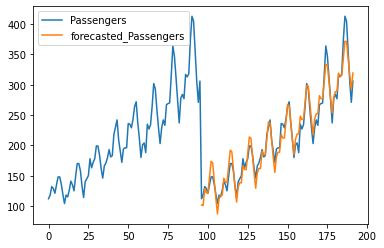

In [35]:
new_var[['Passengers','forecasted_Passengers']].reset_index(drop=True).plot()